Multiple Linear Regression is one of the important regression algorithms which models the linear relationship between a single dependent continuous variable and more than one independent variable.

In [ ]:
"""Problem Description:

We have a dataset of 50 start-up companies.
This dataset contains five main information:
R&D Spend, Administration Spend, Marketing Spend, State, and Profit for a financial year.
Our goal is to create a model that can easily determine which company has a maximum profit, and which is the most affecting factor for the profit of a company."""

'Problem Description:\n\nWe have a dataset of 50 start-up companies. \nThis dataset contains five main information: \nR&D Spend, Administration Spend, Marketing Spend, State, and Profit for a financial year. \nOur goal is to create a model that can easily determine which company has a maximum profit, and which is the most affecting factor for the profit of a company.'

In [ ]:
#Steps to implement Machine Learning
"""duplicated Values Remove
Null values Remove
Categorical Column remove
standardised data
spliting the data
train the data
testing the data"""

'duplicated Values Remove\nNull values Remove\nCategorical Column remove\nstandardised data\nspliting the data\ntrain the data\ntesting the data'

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/sample_data/35 Startups_Multiple_Linear_Regression.csv")

In [ ]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
df.shape

(50, 5)

In [ ]:
df.size

250

In [ ]:
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [ ]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [ ]:
df.nunique()

R&D Spend          49
Administration     50
Marketing Spend    48
State               3
Profit             50
dtype: int64

In [ ]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
dtype: bool

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.dropna() #dropping NA values

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


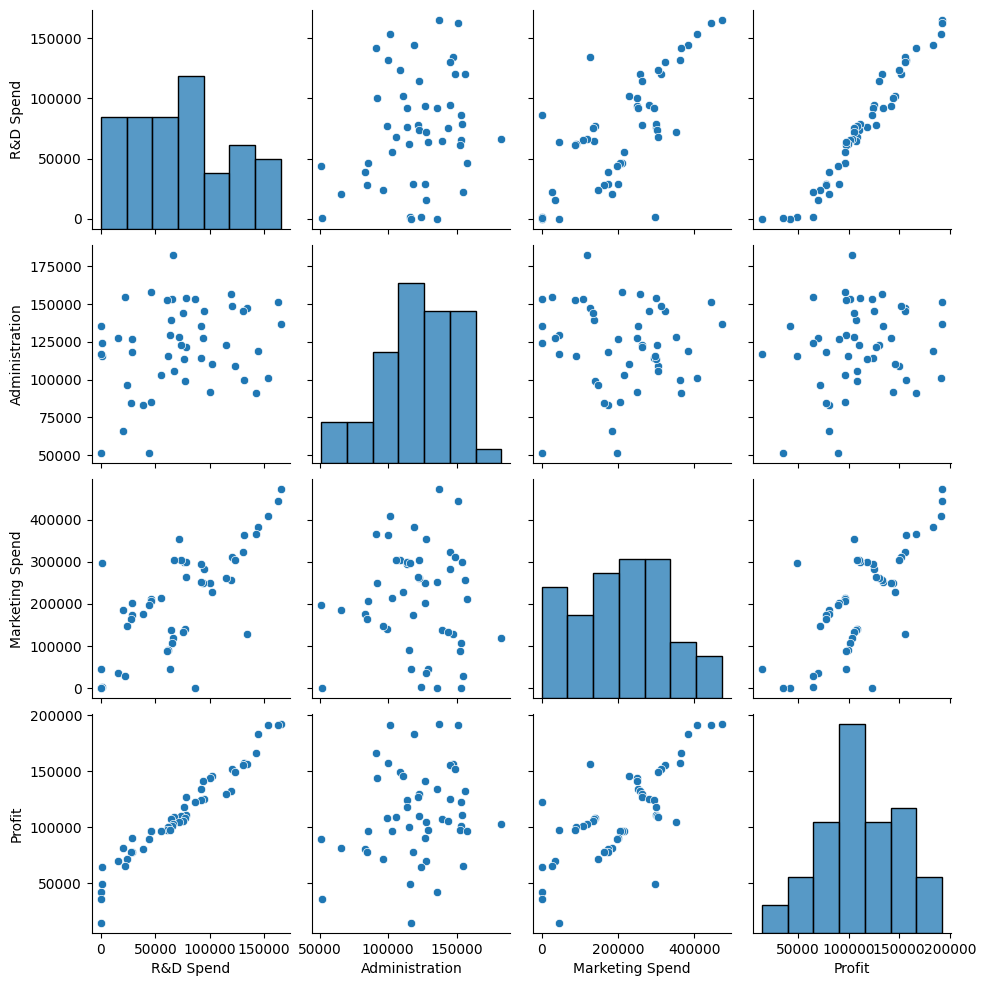

In [ ]:
sns.pairplot(df)

In [ ]:
X=df[["R&D Spend","Administration","Marketing Spend"]]

In [ ]:
X.shape

(50, 3)

In [ ]:
from sklearn.preprocessing import StandardScaler #sacleing the features becz of huge variation in the values

In [ ]:
ss=StandardScaler()
X=ss.fit_transform(X)

In [ ]:
X

array([[ 2.01641149e+00,  5.60752915e-01,  2.15394309e+00],
       [ 1.95586034e+00,  1.08280658e+00,  1.92360040e+00],
       [ 1.75436374e+00, -7.28257028e-01,  1.62652767e+00],
       [ 1.55478369e+00, -9.63646307e-02,  1.42221024e+00],
       [ 1.50493720e+00, -1.07991935e+00,  1.28152771e+00],
       [ 1.27980001e+00, -7.76239071e-01,  1.25421046e+00],
       [ 1.34006641e+00,  9.32147208e-01, -6.88149930e-01],
       [ 1.24505666e+00,  8.71980011e-01,  9.32185978e-01],
       [ 1.03036886e+00,  9.86952101e-01,  8.30886909e-01],
       [ 1.09181921e+00, -4.56640246e-01,  7.76107440e-01],
       [ 6.20398248e-01, -3.87599089e-01,  1.49807267e-01],
       [ 5.93085418e-01, -1.06553960e+00,  3.19833623e-01],
       [ 4.43259872e-01,  2.15449064e-01,  3.20617441e-01],
       [ 4.02077603e-01,  5.10178953e-01,  3.43956788e-01],
       [ 1.01718075e+00,  1.26919939e+00,  3.75742273e-01],
       [ 8.97913123e-01,  4.58678535e-02,  4.19218702e-01],
       [ 9.44411957e-02,  9.11841968e-03

In [ ]:
Y=df["Profit"]

In [ ]:
Y.shape

(50,)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#split the dataset into training data and training data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=10)

In [ ]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((37, 3), (13, 3), (37,), (13,))

In [ ]:
#now implement the Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr=LinearRegression()

In [ ]:
lr.fit(X_train,Y_train)

LinearRegression()

In [ ]:
y_pred=lr.predict(X_test)

In [ ]:
y_pred

array([ 88361.6924659 , 109068.75037541,  66233.18132181,  70645.38100143,
        48118.47333074, 115786.66944536, 171799.96557761,  99617.55808099,
       159031.78297409, 157877.26074356,  83222.30531514, 179714.94106163,
        75105.99525989])

In [ ]:
lr.score(X_train,Y_train)

0.9310605936487033

In [ ]:
lr.score(X_test,Y_test)

0.9878392927652377

In [ ]:
lr.intercept_

111675.78913907126

In [ ]:
lr.coef_

array([36077.48534245,  -219.17000538,  2819.81544887])

In [ ]:
#now find the error/ cost function/loss function

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [ ]:
mean_absolute_error(Y_test,y_pred)

3476.6285513802627

In [ ]:
mean_absolute_percentage_error(Y_test,y_pred)

0.032672215269165125

Method 2 from sir point of views- refer from project no 8

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df2=pd.read_csv("/content/sample_data/35 Startups_Multiple_Linear_Regression.csv")

In [ ]:
df2.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
df2.shape

(50, 5)

In [ ]:
df2.size

250

In [ ]:
df2.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [ ]:
df2.ndim

2

In [ ]:
df2.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
df2.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [ ]:
df2.nunique()

R&D Spend          49
Administration     50
Marketing Spend    48
State               3
Profit             50
dtype: int64

In [ ]:
df2["R&D Spend"].unique()

array([165349.2 , 162597.7 , 153441.51, 144372.41, 142107.34, 131876.9 ,
       134615.46, 130298.13, 120542.52, 123334.88, 101913.08, 100671.96,
        93863.75,  91992.39, 119943.24, 114523.61,  78013.11,  94657.16,
        91749.16,  86419.7 ,  76253.86,  78389.47,  73994.56,  67532.53,
        77044.01,  64664.71,  75328.87,  72107.6 ,  66051.52,  65605.48,
        61994.48,  61136.38,  63408.86,  55493.95,  46426.07,  46014.02,
        28663.76,  44069.95,  20229.59,  38558.51,  28754.33,  27892.92,
        23640.93,  15505.73,  22177.74,   1000.23,   1315.46,      0.  ,
          542.05])

In [ ]:
df2["Administration"].unique()

array([136897.8 , 151377.59, 101145.55, 118671.85,  91391.77,  99814.71,
       147198.87, 145530.06, 148718.95, 108679.17, 110594.11,  91790.61,
       127320.38, 135495.07, 156547.42, 122616.84, 121597.55, 145077.58,
       114175.79, 153514.11, 113867.3 , 153773.43, 122782.75, 105751.03,
        99281.34, 139553.16, 144135.98, 127864.55, 182645.56, 153032.06,
       115641.28, 152701.92, 129219.61, 103057.49, 157693.92,  85047.44,
       127056.21,  51283.14,  65947.93,  82982.09, 118546.05,  84710.77,
        96189.63, 127382.3 , 154806.14, 124153.04, 115816.21, 135426.92,
        51743.15, 116983.8 ])

In [ ]:
df2["Marketing Spend"].unique()

array([471784.1 , 443898.53, 407934.54, 383199.62, 366168.42, 362861.36,
       127716.82, 323876.68, 311613.29, 304981.62, 229160.95, 249744.55,
       249839.44, 252664.93, 256512.92, 261776.23, 264346.06, 282574.31,
       294919.57,      0.  , 298664.47, 299737.29, 303319.26, 304768.73,
       140574.81, 137962.62, 134050.07, 353183.81, 118148.2 , 107138.38,
        91131.24,  88218.23,  46085.25, 214634.81, 210797.67, 205517.64,
       201126.82, 197029.42, 185265.1 , 174999.3 , 172795.67, 164470.71,
       148001.11,  35534.17,  28334.72,   1903.93, 297114.46,  45173.06])

In [ ]:
df2["State"].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [ ]:
df2["Profit"].unique()

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [ ]:
df2.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
dtype: bool

In [ ]:
df2.duplicated().count()

50

In [ ]:
df2.duplicated().sum()

0

In [ ]:
df2.drop_duplicates(inplace=True)

In [ ]:
df2.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
dtype: bool

In [ ]:
df2.dropna()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
x=df2.iloc[:,:-1].values #features

In [ ]:
x

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California'],
       [101913.08, 110594.11, 229160.95, 'Florida'],
       [100671.96, 91790.61, 249744.55, 'California'],
       [93863.75, 127320.38, 249839.44, 'Florida'],
       [91992.39, 135495.07, 252664.93, 'California'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [114523.61, 122616.84, 261776.23, 'New York'],
       [78013.11, 121597.55, 264346.06, 'California'],
       [94657.16, 145077.58, 282574.31, 'New York'],
       [91749.16, 114175.79, 29491

In [ ]:
y=df2.iloc[:,-1].values #labels

In [ ]:
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [ ]:
#now we have to handle the categorical column usning column transformer and OneHotEncoding and LabelEncodining technique

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[3])], remainder = 'passthrough')
x= np.array(ct.fit_transform(x))

In [ ]:
x

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

In [ ]:
#now we can implement the ML model train test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10)

In [ ]:
x_train

array([[1.0, 0.0, 0.0, 63408.86, 129219.61, 46085.25],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [0.0, 0.0, 1.0, 78389.47, 153773.43, 299737.29],
       [0.0, 0.0, 1.0, 46014.02, 85047.44, 205517.64],
       [0.0, 0.0, 1.0, 72107.6, 127864.55, 353183.81],
       [0.0, 1.0, 0.0, 91749.16, 114175.79, 294919.57],
       [0.0, 0.0, 1.0, 61136.38, 152701.92, 88218.23],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 46426.07, 157693.92, 210797.67],
       [0.0, 0.0, 1.0, 1000.23, 124153.04, 1903.93],
       [0.0, 1.0, 0.0, 75328.87, 144135.98, 134050.07],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 73994.56, 122782.75, 303319.26],
       [0.0, 0.0, 1.0, 86419.7, 153514.11, 0.0],
       [0.0, 0.0, 1.0, 94657.16, 145077.58, 282574.31],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
     

In [ ]:
y_train

array([ 97427.84, 146121.95, 111313.02,  96479.51, 105008.31, 124266.9 ,
        97483.56, 191792.06, 141585.52,  96712.8 ,  64926.08, 105733.54,
       156991.12, 134307.35, 110352.25, 122776.86, 125370.37, 132602.65,
       166187.94,  77798.83,  96778.92, 108552.04, 144259.4 ,  81229.06,
       126992.93,  35673.41,  49490.75,  14681.4 , 152211.77,  69758.98,
       101004.64, 107404.34, 103282.38, 192261.83, 129917.04,  90708.19,
       149759.96])

In [ ]:
y_train

array([ 97427.84, 146121.95, 111313.02,  96479.51, 105008.31, 124266.9 ,
        97483.56, 191792.06, 141585.52,  96712.8 ,  64926.08, 105733.54,
       156991.12, 134307.35, 110352.25, 122776.86, 125370.37, 132602.65,
       166187.94,  77798.83,  96778.92, 108552.04, 144259.4 ,  81229.06,
       126992.93,  35673.41,  49490.75,  14681.4 , 152211.77,  69758.98,
       101004.64, 107404.34, 103282.38, 192261.83, 129917.04,  90708.19,
       149759.96])

In [ ]:
y_test

array([ 89949.14, 108733.99,  65200.33,  71498.49,  42559.73, 118474.03,
       182901.99,  99937.59, 155752.6 , 156122.51,  81005.76, 191050.39,
        78239.91])

In [ ]:
#now implement the linear regression model to predict the new outcomes

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg=LinearRegression()

In [ ]:
reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
reg.coef_

array([ 3.33308401e+02,  1.90646775e+02, -5.23955177e+02,  7.94908963e-01,
       -9.24199896e-03,  2.26310528e-02])

In [ ]:
reg.intercept_

49507.17141495356

In [ ]:
reg.score(x_train,y_train)

0.9311628200093645

In [ ]:
reg.score(x_test,y_test)

0.9874051459541274

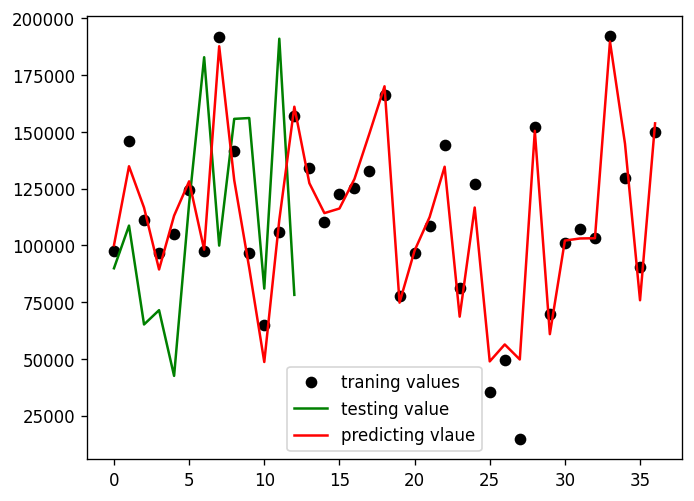

In [ ]:
plt.figure(dpi=120)
plt.plot(y_train,"o",color="Black",label="traning values")
plt.plot(y_test,color="Green",label="testing value")
plt.plot(reg.predict(x_train),color="red",label="predicting vlaue")
plt.legend()

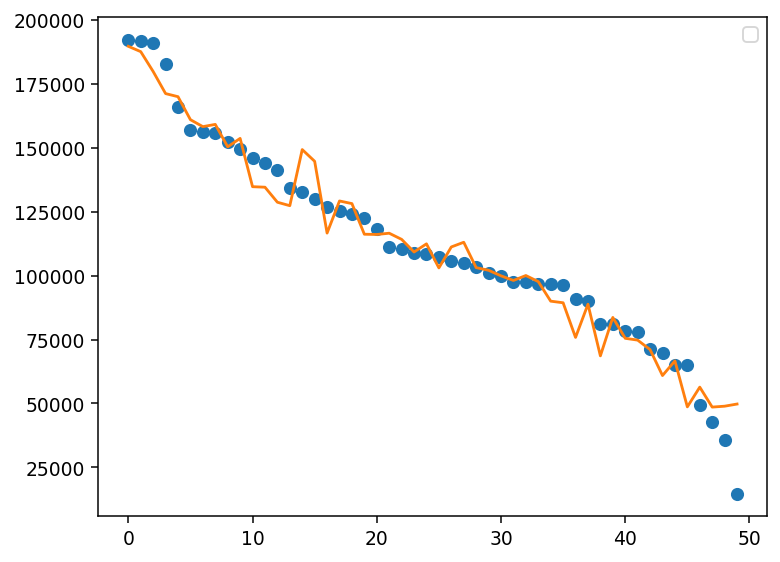

In [ ]:
plt.figure(dpi=135)
plt.plot(y,"o")
plt.plot(reg.predict(x))  #best fit line
plt.legend()

In [ ]:
df3=pd.DataFrame()  #need to check
df3["ActualValue"]=y_test
df3["PredictedValue"]=reg.predict(x_test)
print(df3)

    ActualValue  PredictedValue
0      89949.14    88857.102563
1     108733.99   109299.917912
2      65200.33    66680.290487
3      71498.49    71093.303448
4      42559.73    48588.864362
5     118474.03   116162.086537
6     182901.99   171321.584718
7      99937.59    99971.425331
8     155752.60   159257.651210
9     156122.51   158377.469861
10     81005.76    83684.483035
11    191050.39   179967.050876
12     78239.91    75512.499927
